In [6]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import time
from qutip import *
from numpy import sin, cos, sqrt, array, linspace

In [8]:
%%html
<img src='C:/Users/Ahmad/Desktop/2020/photo source/schematic.jpg',width=350, height=220>

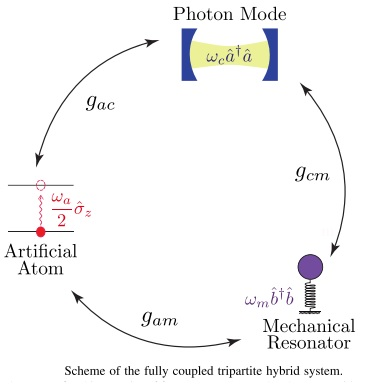

### Hamiltonian For this fully coupled syestem:

$\Large \hat{H}_{0}=\omega_{c}\hat{a}^\dagger \hat{a}+ \frac{\omega_{a}}{2}\hat{\sigma}_{z}+\omega_m \hat{b}^\dagger \hat{b} \\
\Large \;\;\;\;\;\;\;\;\;\;\; ig_{ac}(\hat{\sigma}_{+}\hat{a}-\hat{\sigma}_{-}\hat{a}^\dagger) -
 g_{cm}\hat{a}^\dagger \hat{a}(\hat{b}+\hat{b}^\dagger) -
 g_{am} \hat{\sigma}_{z}(\hat{b}+\hat{b}^\dagger)$
 

### Coherent optical deriving and dissipation
Dynamics of the open system following Lindblad master equation

$\frac{d\hat{\rho}}{dt}= -i[\hat{H}_{0}+\hat{V}_{p}(t), \hat{\rho}] \\
  \;\;\;\;\;\;\; +\gamma_{c}L[\hat{a}]\hat{\rho}+\gamma_{a}L[\hat{\sigma}_{-}]\hat{\rho} \\
  \;\;\;\;\;\;\; +n_{th}\gamma_{m}L[\hat{b}^\dagger]
  +(n_{th}+1)\gamma_{m} L[\hat{b}]\hat{\rho}$

Which $\gamma_{m}$,$\gamma_{c}$ and $\gamma_{a}$ are the mechanical, cavity, and atomic
loss rates. $n_{th}$ is the thermal mean phonon occupancy. 

$\hat{V}_{p}(t)$ is coherent optical derive with frequency $\omega_{p}$ and amplitude $F_p$

$\hat{V}_{p}(t)= iF_p (\hat{a}^\dagger e^{i\omega_p t}-\hat{a} e^{-i\omega_p t})$

in order to remove t-dependence of H, we move to the rotating frame via unitary transformation...
Eventually, this is a H:

$ \hat{H}_{0}=\Delta_{cp}\hat{a}^\dagger \hat{a}+ \Delta_{ap}\hat{\sigma}_{z}+\omega_m \hat{b}^\dagger \hat{b} \\
 \;\;\;\;\;\;\; +ig_{ac}(\hat{\sigma}_{+}\hat{a}-\hat{\sigma}_{-}\hat{a}^\dagger) -
 g_{cm}\hat{a}^\dagger \hat{a}(\hat{b}+\hat{b}^\dagger) -
 g_{am} \hat{\sigma}_{z}(\hat{b}+\hat{b}^\dagger) \\
\;\;\;\;\;\;\; + iF_p (\hat{a}^\dagger -\hat{a} ) $

here $\Delta_{cp}=\omega_c- \omega_p$ , and 

$\Delta_{ap}=\omega_a- \omega_p$ OR $\Delta_{ap}=\color{red}{\frac{\omega_a}{2}}- \omega_p$ ??


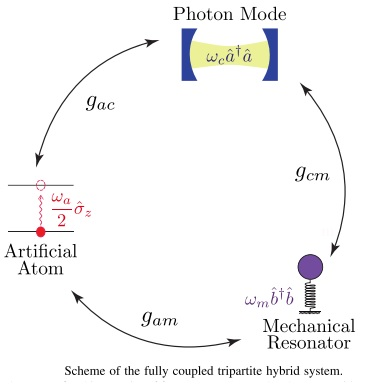

In [7]:
Image(filename='C:/Users/Ahmad/Desktop/2020/photo source/schematic.jpg',width=350, height=220)

## Autocorrelation
Here we try to recalculate and visualize result in the main paper
specially Fig. 5 


In [66]:
# parameter values
wm = 1.0                   #  mechanical frequency
wc = 100 * wm                  # cavity frequency.... 
wa = wc                      # resonance case

gamma_a = wa * 1e-4
gamma_c = gamma_a            # atom loss
gamma_m = wm * 1e-4            # mechanical loss

g_ac = wm/2.0               # atom-cavity coupling strength
g_cm = 0.1 * wm               # cavity-resonator coupling
#g_am =                # atom-resonator coupling
delta_ac = wa - wc        # atom-cavity detuning 
omega_p = wc/2.0 + sqrt((delta_ac**2)/4 + g_ac**2)      # eigenenergies for atom-cavity subsystem
omega_m = wc/2.0 - sqrt((delta_ac**2)/4 + g_ac**2)      # for case which n=1
#omega_m = wc/2.0 -  g_ac
wp = omega_m  # - wm             # laser frequency
n_th=3.45               # thermal mean phonon occupancy
F_p = gamma_c
delta_cp = wc - wp        # cavity-driving detuning
delta_ap = (wa - wp) # * 0.5        # atom-driving detuning   or wa/2 ?

gamma_a/wm

0.01

In [67]:
print('g_ac/wm=', g_ac/wm )
print("gamma_a/wm=", gamma_a/wm )
print("g_cm/wm=", g_cm/wm )
print("Q_m=", wm/gamma_m,"Q_c=",wc/gamma_c, "Q_a=", wa/gamma_a )
print("F_p/gamma_a=",F_p/gamma_c)
print("ommega_m=", omega_m,"wp=", wp, "wc=", wc,"wm=", wm)
print("delta_ac=", delta_ac,"delta_cp=", delta_cp,"delta_ap=", delta_ap)
print('n_th = ', n_th)

g_ac/wm= 0.5
gamma_a/wm= 0.01
g_cm/wm= 0.1
Q_m= 10000.0 Q_c= 10000.0 Q_a= 10000.0
F_p/gamma_a= 1.0
ommega_m= 49.5 wp= 49.5 wc= 100.0 wm= 1.0
delta_ac= 0.0 delta_cp= 50.5 delta_ap= 50.5
n_th =  3.45


In [ ]:
g_ac


In [86]:
Nc = 6     # cavity photon number
Nm = 6     # mechanical phonon number 

a = tensor(qeye(2), qeye(Nm),destroy(Nc))     # cavity anihilation operator
b = tensor(qeye(2), destroy(Nm),qeye(Nc))      # phonon anihilation opr

sigma_z = tensor(sigmaz(), qeye(Nm), qeye(Nc))
sigma_p = tensor(sigmap(), qeye(Nm), qeye(Nc))  # raising and lowering ops for atom
sigma_m = tensor(sigmam(), qeye(Nm), qeye(Nc))
    
collapse = []


rate = gamma_c
if rate > 0.0: 
    collapse.append(a * sqrt(rate))
rate = gamma_a
if rate > 0.0 : 
    collapse.append(sigma_m * sqrt(rate))
rate = n_th * gamma_m
if rate > 0.0: 
    collapse.append(b.dag() * sqrt(rate))
rate = (n_th+1) * gamma_m
if rate > 0.0 : 
    collapse.append(b * sqrt(rate))

expct_op = []
expct_op.append(b.dag()*b)

bdagb = []
g20 = []            # to calculate autocorelation b.dag*b

# defining H as a function of atom-phonon coupling --->> g_am
g_amlist = np.linspace(0.25,0.75,30) * g_cm         # g_am range 

for g_am in g_amlist:
    
    H = delta_cp * a.dag() * a + (wa-wp) *sigma_z  + (wm) * b.dag() * b \
    + 1j * g_ac * (sigma_p * a - sigma_m * a.dag()) - g_cm * a.dag() * a *(b.dag() + b) \
    - g_am * sigma_z * (b.dag() + b) + 1j* F_p *(a.dag()-a)
    
    rho_ss = steadystate(H, collapse)           # final state for steady state
    bdagb.append(expect(b.dag()* b, rho_ss))    # calculate expectation of b.dag*b for steady state 
    # calculate g^(2)(0)
    g20.append(expect(b.dag()* b.dag()* b * b, rho_ss)/expect (b.dag()*b,rho_ss)**2)
    #return steadystate(H, collapse)


In [10]:
bdagb[27]

1.506931945484261

In [ ]:
"""
# different way!
def calculate_rho_ss(g_am): 
    H = delta_cp * a.dag() * a + delta_ap *sigma_z + wm * b.dag() * b \
    + 1j * g_ac * (sigma_p * a - sigma_m * a.dag()) - g_cm * a.dag() * a *(b.dag() + b) \
    - g_am * sigma_z * (b.dag() + b) + 1j* F_p *(a.dag()-a)
    
    return(H,cpllapse)

g_amlist = np.linspace(0.05,0.75,10) * g_cm         # g_am range 
start_time=time.time()

rho_ss = parallel_map(calculate_rho_ss, g_amlist )

bdagb = expect(b.dag() * b , rho_ss)
#g20 = expect(b.dag()* b.dag()* b * b, rho_ss)/bdagb**2
finish_time=time.time()
print('time elapsed = ',finish_time-start_time)
"""

#### Visualize the results

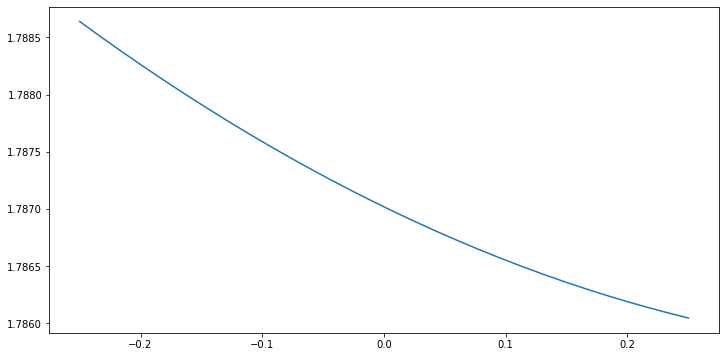

In [88]:
fig, ax= plt.subplots(figsize=(12,6))
ax.plot((g_cm/2.0-g_amlist)/g_cm ,np.real(bdagb))
#ax.plot((g_cm/2.0-g_amlist)/g_cm ,np.real(g20))

َAutocorrelation $g^{2}(0)=\langle b^ \dagger b^ \dagger b b \rangle / \langle b^ \dagger b \rangle ^{2}$ 
and steady photon number $\langle a^ \dagger a \rangle $

as a function of pump frequency $\omega_p$

In [36]:
# parameter values
wm = 1.0                   #  mechanical frequency
wc = 100 * wm                  # cavity frequency.... 
wa = wc                      # resonance case
gamma_a = wa * 1e-5
gamma_c = gamma_a            # atom loss
gamma_m = wm * 1e-5            # mechanical loss
g_ac = wm/2.0               # atom-cavity coupling strength
g_cm = 0.1 * wm               # cavity-resonator coupling
g_am = -wm/40.0               # atom-resonator coupling ??


delta_ac = wa - wc        # atom-cavity detuning 
omega_p = wc/2.0 + g_ac      # eigenenergies for atom-cavity subsystem
omega_m = wc/2.0 - g_ac    # for case which n=1
#omega_m = wc/2.0 -  g_ac
n_th= 0 # 3.45               # thermal mean phonon occupancy

F_p = gamma_c
#delta_cp = wc - wp        # cavity-driving detuning
#delta_ap = (wa - wp) # * 0.5        # atom-driving detuning   or wa/2 ?

omega_p-2*g_cm


50.3

In [37]:
print('g_ac/wm=', g_ac/wm )
print("gamma_a/wm=", gamma_a/wm )
print("g_cm/wm=", g_cm/wm )
print("Q_m=", wm/gamma_m,"Q_c=",wc/gamma_c, "Q_a=", wa/gamma_a )
print("F_p/gamma_a=",F_p/gamma_c)
print("ommega_m=", omega_m,"wp=", wp, "wc=", wc,"wm=", wm)
print("delta_ac=", delta_ac,"delta_cp=", delta_cp,"delta_ap=", delta_ap)
print('n_th = ', n_th)

g_ac/wm= 0.5
gamma_a/wm= 0.001
g_cm/wm= 0.1
Q_m= 99999.99999999999 Q_c= 100000.0 Q_a= 100000.0
F_p/gamma_a= 1.0
ommega_m= 49.5 wp= 49.5 wc= 100.0 wm= 1.0
delta_ac= 0.0 delta_cp= 50.5 delta_ap= 50.5
n_th =  0


In [64]:
Nc = 6     # cavity photon number
Nm = 6     # mechanical phonon number 

a = tensor(qeye(2), qeye(Nm),destroy(Nc))     # cavity anihilation operator
b = tensor(qeye(2), destroy(Nm),qeye(Nc))      # phonon anihilation opr

sigma_z = tensor(sigmaz(), qeye(Nm), qeye(Nc))
sigma_p = tensor(sigmap(), qeye(Nm), qeye(Nc))  # raising and lowering ops for atom
sigma_m = tensor(sigmam(), qeye(Nm), qeye(Nc))
    
collapse = []


rate = gamma_c
if rate > 0.0: 
    collapse.append(a * sqrt(rate))
rate = gamma_a
if rate > 0.0 : 
    collapse.append(sigma_m * sqrt(rate))
rate = n_th * gamma_m
if rate > 0.0: 
    collapse.append(b.dag() * sqrt(rate))
rate = (n_th+1) * gamma_m
if rate > 0.0 : 
    collapse.append(b * sqrt(rate))


adaga = []
g20 = []            # to calculate autocorelation b.dag*b

# defining H as a function of atom-phonon coupling --->> g_am
wp_list = np.linspace(50.3,50.7,300)              # laser frequency range      

for wp in wp_list:
    
    H = (wc - wp) * a.dag() * a +(wa/2.0-wp) *sigma_z  + (wm-wp) * b.dag() * b \
    + 1j * g_ac * (sigma_p * a - sigma_m * a.dag()) - g_cm * a.dag() * a *(b.dag() + b) \
    - g_am * sigma_z * (b.dag() + b) + 1j* F_p *(a.dag()-a)
    
    rho_ss = steadystate(H, collapse)           # final state for steady state
    adaga.append(expect(a.dag()* a, rho_ss))    # calculate expectation of b.dag*b for steady state 
    # calculate g^(2)(0)
    g20.append(expect(b.dag()* b.dag()* b * b, rho_ss)/expect (b.dag()*b,rho_ss)**2)
    #return steadystate(H, collapse)

#### Visualize the results

Text(0, 0.5, '$\\langle a^ \\dagger a \\rangle $')

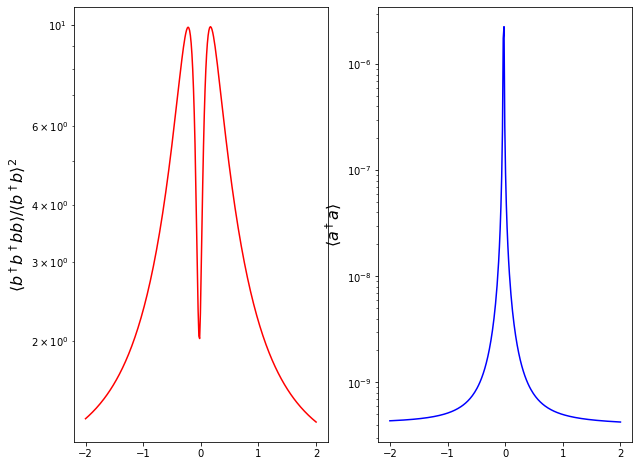

In [65]:
fig, ax= plt.subplots(1,2,figsize=(10,8))
ax[0].plot((omega_p-wp_list)/g_cm ,np.real(g20),'r')
ax[1].plot((omega_p-wp_list)/g_cm ,np.real(adaga),'b')

#plt.semilogy((omega_p-wp_list)/g_cm ,np.real(g20))
#plt.semilogy((omega_p-wp_list)/g_cm ,np.real(adaga))
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_ylabel(r'$\langle b^ \dagger b^ \dagger b b \rangle / \langle b^ \dagger b \rangle ^{2} $',fontsize=16)
ax[1].set_ylabel(r'$\langle a^ \dagger a \rangle $',fontsize=16)